In [31]:
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt

## Загрузка данных

В данном проекте будет предсказываться отток клиентов телеком компании. На основе различных данных о клиентах, построим модель. Ниже приведен список фичей.

In [32]:
data = pd.read_csv('./train.csv')

In [33]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

numeric_indices = np.array([0, 1, 2])
categorical_indices = np.array([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

feature_cols = num_cols + cat_cols
target_col = 'Churn'
y = data.Churn

### Исследование данных
1) Посмотрим на случайные строчки. 

2) Посмотрим, есть ли в датасете незаполненные значения.

In [34]:
st, col=data.shape
a=np.random.randint(st,size=(5))  #выбираем 5 случайных строк
data.iloc[a]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
2104,59,24.45,1493.1,Female,0,No,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Electronic check,0
109,32,69.75,2347.9,Male,0,Yes,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),1
3703,67,94.35,6341.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,No,Yes,No,Yes,One year,Yes,Credit card (automatic),1
2643,63,25.25,1559.3,Male,0,No,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1139,12,84.05,966.55,Female,0,No,Yes,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,0


In [35]:
data.isna().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Любым из этих двух способов можно искать nan-значения. Видим, что пропусков нигде нет, но есть строки, заполненные пробелами, которые такая проверка не выявляет. Заменим такие строчки нулями. Также видно, что в числовой графе "TotalSpent" тип данных указан, как object, а хотелось бы работать с числами. Заменим этот тип на float.

In [36]:
data["TotalSpent"] = data["TotalSpent"].apply(lambda x: x if x != ' ' else 0)
data["TotalSpent"] = pd.to_numeric(data.TotalSpent)

## Анализ данных

Перед тем как начать строить модели, посмотрим на данные, которые у нас имеются.

1) Для численных призанков построим гистограмму, а для категориальных посчитаем количество каждого значения для каждого признака. Изобразим это графически 

2) Посмотрим на распределение целевой переменной и выясним, являются ли классы несбалансированными.

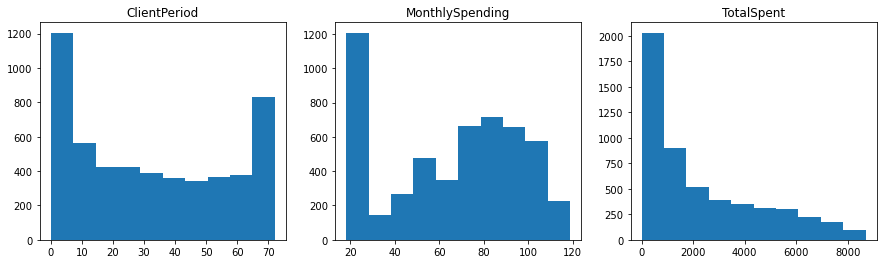

In [37]:
#гистограмма для численных признаков
fig1, ax1 = plt.subplots(1,3, figsize = (15,4))
for  i, col in enumerate(num_cols):
    ax1[i].hist(data[col])
    ax1[i].title.set_text(col)

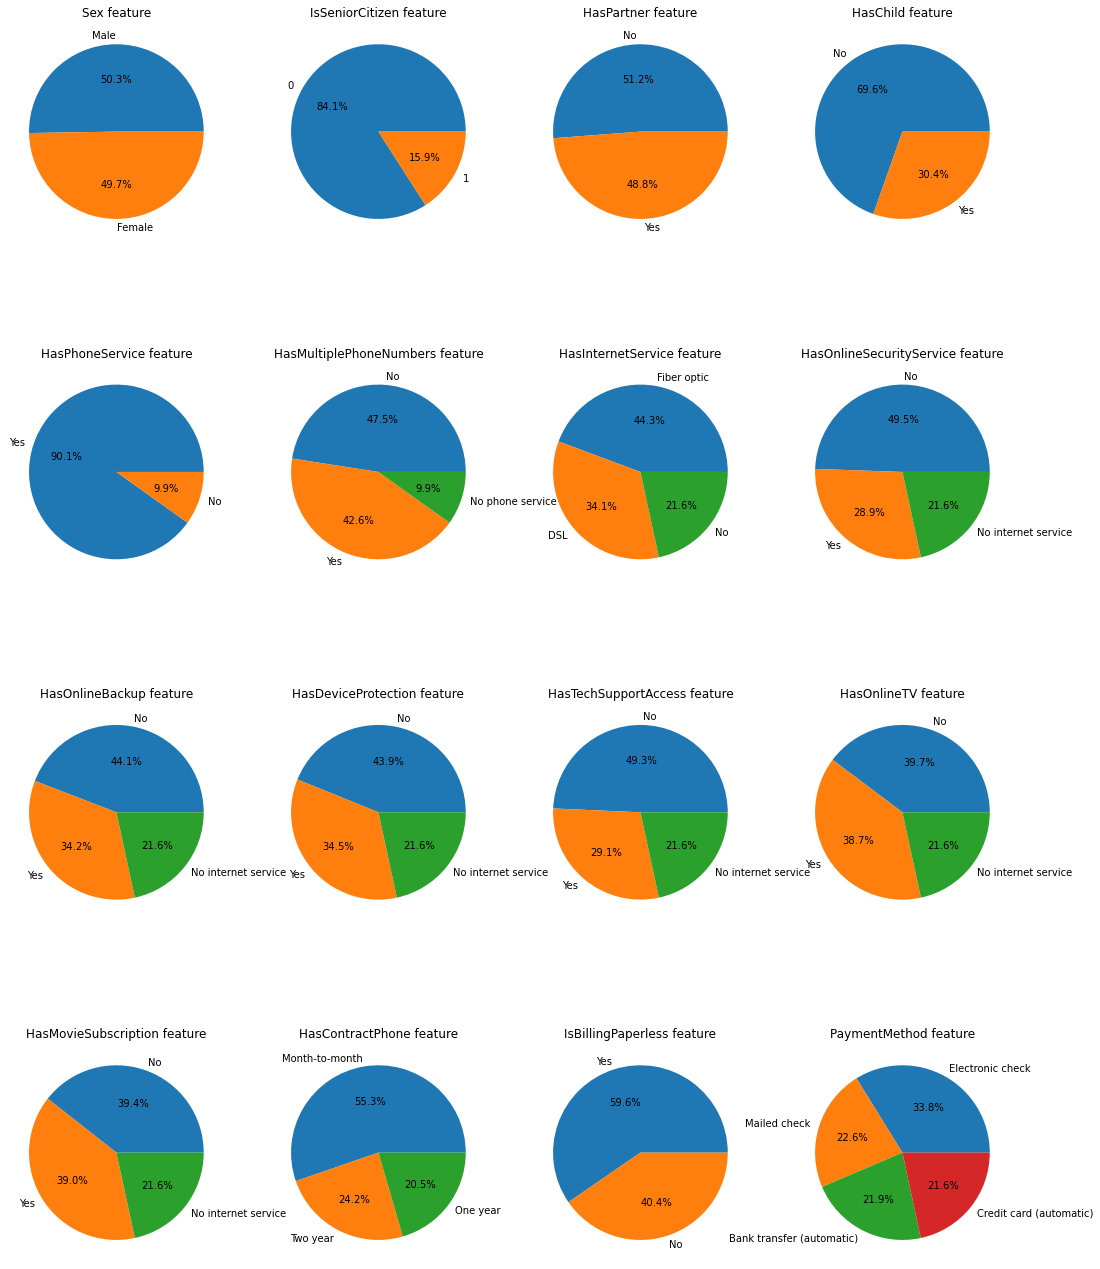

In [38]:
#круговые диаграммы для категориальных признаков
fig2, ax2 = plt.subplots(4, 4, figsize=(18, 24))

ax2 = ax2.ravel()
plt.axis
for i, cat_col in enumerate(cat_cols):
    values = []
    labels = []
    value_counts = data[cat_col].value_counts()
    len_col = len(value_counts.values)
    for j in range(len_col):
        values.append(value_counts.values[j])
        labels.append(value_counts.index[j])
    ax2[i].set_title('{} feature'.format(cat_col))
    ax2[i].pie(values, labels=labels, autopct='%1.1f%%')


In [39]:
#проверка классов на сбалансированность
data['Churn'].value_counts()

0    3898
1    1384
Name: Churn, dtype: int64

Видим, что классы относительно сбалансированы, разница примерно в 3 раза. Задачи с несбалансированными классами решаются иначе, в этом случае не используется accuracy, как метрика, и следует использовать методы борьбы с imbalanced dataset. Датасет можно назвать несбалансированным, если разница количестве значений искомого класса составляет больше, чем в 20 раз.

## Применение линейных моделей 

Сначала попробуем применить линейные модели. Будем использовать логистическую регрессию и подбирать к ней лучшие параметры.

1) Отнормируем числовые признаки, а категориальные закодируем с помощью one-hot-encoding'а, чтобы к ним можно было применить LogisticRegression.

2) Протестируем разные значения гиперпараметра C и выберем лучший по метрике ROC-AUC. 

In [54]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import roc_auc_score, roc_curve

In [41]:
categorial_data = data[cat_cols]
numeric_data=data[num_cols]

In [42]:
# Обработка данных: нормировка числовых признаков и кодирование категориальные с помощью one-hot-encoding'а. Деление выборки
dummy_features = pd.get_dummies(categorial_data)
X = pd.concat([numeric_data, dummy_features], axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_scaled = scaler.fit_transform(X.values)

In [43]:
#логистическая регрессия через LogisticRegression и GridSearchCV
LogReg = LogisticRegression(penalty='l2', random_state=0)
params={'C':[100, 10, 1, 0.1, 0.01, 0.001],
        'max_iter': range(100, 400, 50)}
clf=GridSearchCV(LogReg, params, refit=True, cv=5)
clf.fit(X_train_scaled, y_train)
LogReg_best=clf.best_estimator_
LogReg_best.get_params()
print ('Max auc_roc_train:', roc_auc_score(LogReg_best.predict(X_train_scaled),y_train),
       '\nMax auc_roc_valid:', roc_auc_score(LogReg_best.predict(X_valid_scaled),y_valid))

Max auc_roc_train: 0.7624975694578564 
Max auc_roc_valid: 0.7216634738186463


In [44]:
#логистическая регрессия через LogisticRegressionCV
C=[100, 10, 1, 0.1, 0.01, 0.001]
LogRegCV = LogisticRegressionCV(penalty='l2', cv=10, Cs=C,
                                random_state=0, refit=True, scoring='roc_auc')
LogRegCV.fit(X_train_scaled, y_train)
LogRegCV.get_params()
scores = LogRegCV.scores_[1]
mean_scores = np.mean(scores, axis=0)
best_C_idx = np.where(mean_scores==np.max(mean_scores))[0][0]
print('Best C:', C[best_C_idx])

Best C: 10


In [45]:
LogRegCV=LogisticRegressionCV(penalty='l2', cv=10, Cs=10,
                                random_state=0, refit=True, scoring='roc_auc')
LogRegCV.fit(X_train_scaled, y_train)
print ('Max auc_roc_train:', LogRegCV.score(X_train_scaled,y_train),
      '\nMax auc_roc_valid:', LogRegCV.score(X_valid_scaled,y_valid))

Max auc_roc_train: 0.853637682360983 
Max auc_roc_valid: 0.8280169189423814


Я попробовала два типа реализации логистической регрессии:
1) Применила LogisticRegression и подбирала лучший параметр с помощью GridSearchCV. В этом случае максимальное значение точности у меня получилось 0.72 с параметром С=1.

2) Использовала LogisticRegressionCV, которая сама находит лучший параметр. Максимальная точность получилась 0.83 с параметром C=10.

## Применение градиентного бустинга

Попробуем применить категориальный бустинг - catboost. В этом случае не надо кодировать категориальные признаки. Численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделим выборку на train/valid. Протестируем catboost cо стандартными параметрами.

2) Протестируем разные занчения параметра количества деревьев и learning_rate и выберем лучшую по метрике ROC-AUC комбинацию.

In [46]:
import catboost

In [47]:
#разделение выборки
data=data.drop('Churn', axis=1)
data_train, data_valid, y_train, y_valid = train_test_split(data, y, 
                                                    train_size=0.8,
                                                    random_state=42)

In [91]:
#обучение catboost со стандартными параметрами
boosting_model = catboost.CatBoostClassifier(n_estimators=300, 
                                             silent=True,
                                             cat_features=categorical_indices,
                                             eval_metric='AUC')
boosting_model.fit(data_train, y_train)
y_train_predicted = boosting_model.predict_proba(data_train)[:, 1]
y_valid_predicted = boosting_model.predict_proba(data_valid)[:, 1]

In [92]:
train_auc = roc_auc_score(y_train, y_train_predicted)
valid_auc = roc_auc_score(y_valid, y_valid_predicted)
print ('Max auc_roc_train:', train_auc,
       '\nMax auc_roc_valid', valid_auc)

Max auc_roc_train: 0.8931447112633472 
Max auc_roc_valid 0.8249323519361661


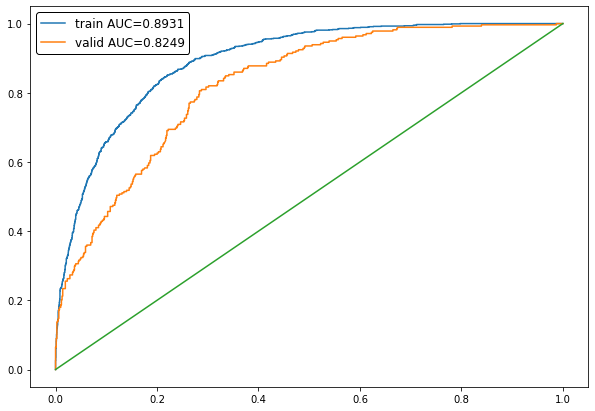

In [93]:
plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_valid, y_valid_predicted)[:2], label='valid AUC={:.4f}'.format(valid_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [50]:
boosting_model = catboost.CatBoostClassifier(silent=True,
                                             cat_features=categorical_indices,
                                             eval_metric='AUC')

grid_search_result = boosting_model.grid_search(
                        {'n_estimators':[200,300],
                         'learning_rate':np.linspace(0.1, 0.001, 5), 
                         'l2_leaf_reg': np.linspace(0, 3, 5),
                         'depth': [4,5,6],
                         'grow_policy':['SymmetricTree','Lossguide'],
                        },
  
                          data_train, 
                          y_train, 
                          refit=True,
                          cv=5,
                          stratified=True,)


bestTest = 0.8367516391
bestIteration = 145

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8367516	best: 0.8367516 (0)	total: 5.34s	remaining: 26m 35s

bestTest = 0.8400405452
bestIteration = 152

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8400405	best: 0.8400405 (1)	total: 11.1s	remaining: 27m 29s

bestTest = 0.8386674718
bestIteration = 174

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8386675	best: 0.8400405 (1)	total: 16.6s	remaining: 27m 27s

bestTest = 0.8362987405
bestIteration = 199

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8362987	best: 0.8400405 (1)	total: 21.8s	remaining: 26m 


bestTest = 0.8395588912
bestIteration = 276

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
33:	loss: 0.8395589	best: 0.8452956 (31)	total: 3m 27s	remaining: 27m 5s

bestTest = 0.8130391649
bestIteration = 299

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
34:	loss: 0.8130392	best: 0.8452956 (31)	total: 3m 36s	remaining: 27m 16s

bestTest = 0.8436062227
bestIteration = 239

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
35:	loss: 0.8436062	best: 0.8452956 (31)	total: 3m 44s	remaining: 27m 24s

bestTest = 0.8415825569
bestIteration = 193

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
36:	loss: 0.8415826	best: 0.8452956 (31)	total: 3m 52s	rema


bestTest = 0.8426177536
bestIteration = 199

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
66:	loss: 0.8426178	best: 0.8452956 (31)	total: 7m 15s	remaining: 25m 14s

bestTest = 0.8396415631
bestIteration = 194

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
67:	loss: 0.8396416	best: 0.8452956 (31)	total: 7m 21s	remaining: 25m 5s

bestTest = 0.8375927364
bestIteration = 199

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
68:	loss: 0.8375927	best: 0.8452956 (31)	total: 7m 26s	remaining: 24m 55s

bestTest = 0.818452381
bestIteration = 25

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
69:	loss: 0.8184524	best: 0.8452956 (31)	total: 7m 32s	remain


bestTest = 0.817938377
bestIteration = 22

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
99:	loss: 0.8179384	best: 0.8452956 (31)	total: 11m 41s	remaining: 23m 22s

bestTest = 0.827801501
bestIteration = 102

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
100:	loss: 0.8278015	best: 0.8452956 (31)	total: 11m 48s	remaining: 23m 15s

bestTest = 0.8367049114
bestIteration = 105

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
101:	loss: 0.8367049	best: 0.8452956 (31)	total: 11m 55s	remaining: 23m 8s

bestTest = 0.832707902
bestIteration = 70

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
102:	loss: 0.8327079	best: 0.8452956 (31)	total: 12m 2s	rem


bestTest = 0.8382253566
bestIteration = 260

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
132:	loss: 0.8382254	best: 0.8452956 (31)	total: 15m 55s	remaining: 20m

bestTest = 0.8355331263
bestIteration = 274

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
133:	loss: 0.8355331	best: 0.8452956 (31)	total: 16m 6s	remaining: 19m 56s

bestTest = 0.8310149241
bestIteration = 37

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
134:	loss: 0.8310149	best: 0.8452956 (31)	total: 16m 16s	remaining: 19m 53s

bestTest = 0.836967305
bestIteration = 126

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
135:	loss: 0.8369673	best: 0.8452956 (31)	total: 16m 27s	re


bestTest = 0.8414244019
bestIteration = 110

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
165:	loss: 0.8414244	best: 0.8452956 (31)	total: 21m 48s	remaining: 17m 36s

bestTest = 0.8407450541
bestIteration = 160

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
166:	loss: 0.8407451	best: 0.8452956 (31)	total: 21m 59s	remaining: 17m 30s

bestTest = 0.8425494594
bestIteration = 191

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
167:	loss: 0.8425495	best: 0.8452956 (31)	total: 22m 9s	remaining: 17m 24s

bestTest = 0.8406048712
bestIteration = 194

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
168:	loss: 0.8406049	best: 0.8452956 (31)	total: 22m 


bestTest = 0.8400333563
bestIteration = 276

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
198:	loss: 0.8400334	best: 0.8452956 (31)	total: 29m 56s	remaining: 15m 11s

bestTest = 0.8275786462
bestIteration = 287

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
199:	loss: 0.8275786	best: 0.8452956 (31)	total: 30m 11s	remaining: 15m 5s

bestTest = 0.8408636703
bestIteration = 84

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
200:	loss: 0.8408637	best: 0.8452956 (31)	total: 30m 32s	remaining: 15m 2s

bestTest = 0.8388004658
bestIteration = 89

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
201:	loss: 0.8388005	best: 0.8452956 (31)	total: 30m 51s


bestTest = 0.8418413561
bestIteration = 114

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
231:	loss: 0.8418414	best: 0.8452956 (31)	total: 41m 24s	remaining: 12m 8s

bestTest = 0.8380276628
bestIteration = 107

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
232:	loss: 0.8380277	best: 0.8452956 (31)	total: 41m 52s	remaining: 12m 2s

bestTest = 0.8398787957
bestIteration = 250

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
233:	loss: 0.8398788	best: 0.8452956 (31)	total: 42m 19s	remaining: 11m 56s

bestTest = 0.8310688406
bestIteration = 294

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
234:	loss: 0.8310688	best: 0.8452956 (31)	total: 42m 4


bestTest = 0.8312377789
bestIteration = 101

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
264:	loss: 0.8312378	best: 0.8452956 (31)	total: 56m 13s	remaining: 7m 25s

bestTest = 0.8429951691
bestIteration = 88

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
265:	loss: 0.8429952	best: 0.8452956 (31)	total: 56m 41s	remaining: 7m 14s

bestTest = 0.8396595353
bestIteration = 93

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
266:	loss: 0.8396595	best: 0.8452956 (31)	total: 57m 8s	remaining: 7m 3s

bestTest = 0.8422331493
bestIteration = 190

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
267:	loss: 0.8422331	best: 0.8452956 (31)	total: 57m 36s	re


bestTest = 0.8432144295
bestIteration = 173

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
297:	loss: 0.8432144	best: 0.8452956 (31)	total: 1h 16m 17s	remaining: 30.7s

bestTest = 0.841740712
bestIteration = 232

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
298:	loss: 0.8417407	best: 0.8452956 (31)	total: 1h 16m 55s	remaining: 15.4s

bestTest = 0.8303104152
bestIteration = 268

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
299:	loss: 0.8303104	best: 0.8452956 (31)	total: 1h 17m 33s	remaining: 0us
Estimating final quality...


In [84]:
# Лучшие параметры для catboost
print(grid_search_result['params'])

{'depth': 4, 'iterations': 300, 'learning_rate': 0.07525000000000001, 'l2_leaf_reg': 0.75, 'grow_policy': 'SymmetricTree'}


In [88]:
y_train_predicted_best = boosting_model.predict_proba(data_train)[:, 1]
y_valid_predicted_best = boosting_model.predict_proba(data_valid)[:, 1]

train_auc_best = roc_auc_score(y_train, y_train_predicted_best)
valid_auc_best = roc_auc_score(y_valid, y_valid_predicted_best)
print ('Max auc_roc_train:', train_auc_best,
       '\nMax auc_roc_valid', valid_auc_best)

Max auc_roc_train: 0.882074342230754 
Max auc_roc_valid 0.8242858857971389


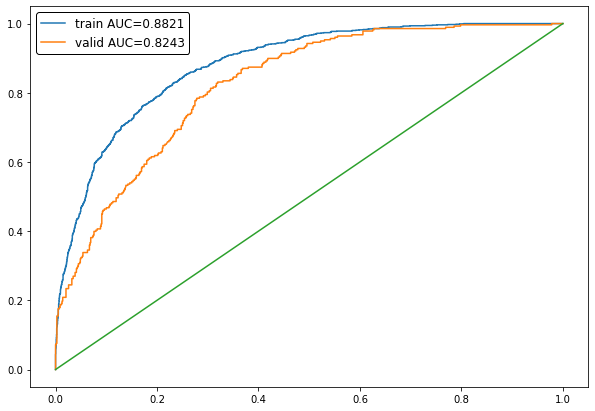

In [89]:
plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted_best)[:2], label='train AUC={:.4f}'.format(train_auc_best))
plt.plot(*roc_curve(y_valid, y_valid_predicted_best)[:2], label='valid AUC={:.4f}'.format(valid_auc_best))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

## Предсказания

Из всех вариантов выберем лучшую модель. Загрузим тестовые данные, применим к ним нашу модель. Результат сохраним в виде csv файла.

In [63]:
#задаем лучшую модель
best_model = boosting_model

In [78]:
#считываем тестовые данные и применяем к ним модель
X_test = pd.read_csv('./test.csv')

submission = pd.DataFrame(pd.Series(best_model.predict_proba(X_test)[:, 1]))
submission = submission.rename(columns={ submission.columns[0]: "Churn"})

#сохраняем файл с ответами
submission.to_csv('./my_submission.csv',index=None)

In [80]:
my_submission = pd.read_csv('./my_submission.csv')

In [81]:
#проверяем, что все сохранилось корректно
my_submission.head()

,Churn
0,0.035520
1,0.765477
2,0.649894
3,0.016541
4,0.001237
